[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/joshmaglione/CS102-Jupyter/main?labpath=.%2FWeek10.ipynb) 

<a href="https://colab.research.google.com/github/joshmaglione/CS102-Jupyter/blob/main/Week10.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

[View on GitHub](https://github.com/joshmaglione/CS102-Jupyter/blob/main/Week10.ipynb)

# Week 10: Regression

We'll continue learning about machine learning. We are still looking at *supervised learning*.

- What is the difference between *supervised* and *unsupervised* learning? 

- What are some examples of each?

In [6]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

We are still working with `scikit-learn` which can help us with several machine learning tasks.

![](imgs/scikitlearn1.png)

![](imgs/scikitlearn2.png)

## Linear regression

You probably already know what linear regression is if the name is unfamiliar.

It is used all the time in sciences.

Linear regression = finding the line of best fit.

![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*N1-K-A43_98pYZ27fnupDA.jpeg)

We perform a linear regression when we want to analyze how some variables (usually one) *linearly* depend on other variables.

**Simplest:** we have data points in $\mathbb{R}^2$.
- We suspect the $y$-values depend, at least in part, on the $x$-values.
- We perform some linear algebra to get the line of best fit, usually written as
$$
	y = \beta x + \varepsilon
$$
- We calculate the $r^2$-value to see how well the line fits the data.
- If it's a decent fit, we can predict a reasonable range of $y$-values for a given $x$-value.

Let's build a simple example.

In [39]:
x = 10 * rng.rand(50) 			# Random numbers between 0 and 10
noise = rng.randn(50)			# Random noise
y = 2 * x - 5 + noise 			# Noisy but near the line 2x - 5

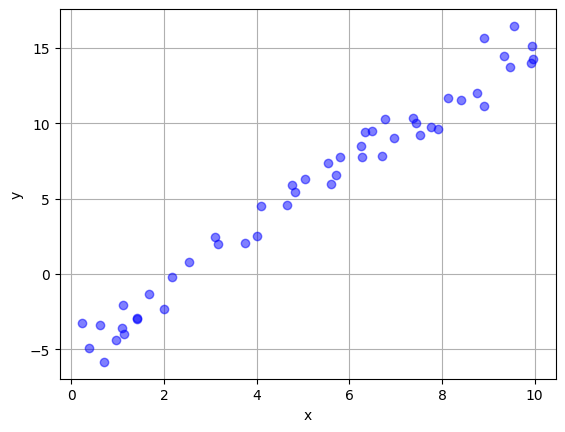

In [40]:
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
_ = plt.scatter(x, y, color='blue', alpha=0.5, zorder=2)

There is a very *clear* trend in the data. We expect a high $r^2$-value.

We'll use `LinearRegression` to get the line of best fit in this simple example.

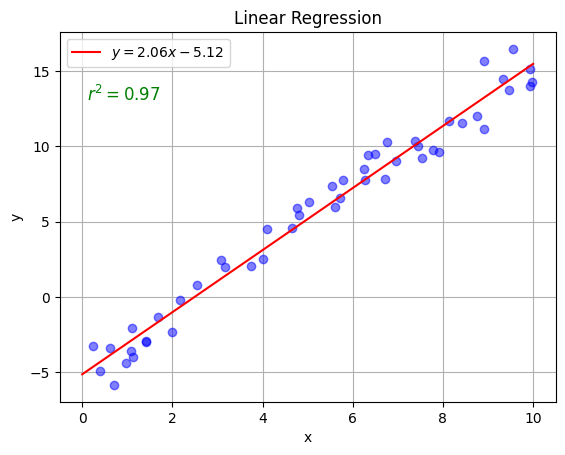

In [41]:
# Fit the model
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 2)			# Only need 2 points to define a line
yfit = model.predict(xfit[:, np.newaxis])
beta = model.coef_[0]					# slope
epsilon = model.intercept_				# intercept
r2 = model.score(x[:, np.newaxis], y)	# r^2-value

# Plot the model
plt.scatter(x, y, color='blue', alpha=0.5, zorder=2)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xfit, yfit, color="red", label=f"$y = {beta:.2f}x {epsilon:.2f}$")
plt.text(0.1, 13, f"$r^2 = {r2:.2f}$", fontsize=12, color="green")
plt.title("Linear Regression")
plt.grid()
plt.legend()
plt.show()

We expected a very high $r^2$-value since we produced the data to have very little noise. 

**Try it yourself:** Scale the vector `noise` above and see how it impacts the $r^2$-value.